In [5]:
import numpy as np
import pandas as pd
df_all = pd.read_csv('data_test.csv')
df_all = df_all.iloc[-500:-1,:]
df_all.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
9499,2074758,26/11/2010,12:42:00,1.342,0.062,236.91,5.6,0.0,0.0,17.0
9500,2074759,26/11/2010,12:43:00,1.360,0.068,239.14,5.6,0.0,0.0,18.0
9501,2074760,26/11/2010,12:44:00,1.360,0.070,239.19,5.6,0.0,0.0,17.0
9502,2074761,26/11/2010,12:45:00,1.366,0.072,239.75,5.6,0.0,0.0,18.0
9503,2074762,26/11/2010,12:46:00,1.306,0.000,239.80,5.4,0.0,0.0,17.0


In [6]:
df_all['date_time'] = pd.to_datetime(df_all['Date'] + ' ' + df_all['Time'])
df_all = df_all.set_index('date_time')
df_all = df_all[['Global_active_power']]
df_all = df_all.dropna()
df_all.columns = ['y']

In [8]:
df_avg = df_all

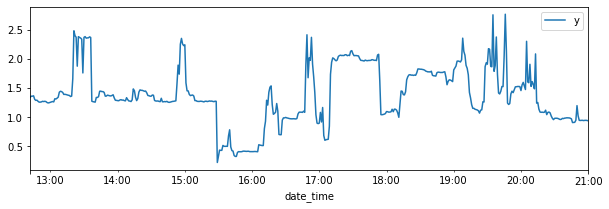

In [9]:
import matplotlib.pyplot as plt
df_avg.plot(figsize=(10, 3))
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_avg['AQI (scaled)'] = scaler.fit_transform(df_avg[['y']])
display(df_avg.head())

,y,AQI (scaled)
date_time,,
2010-11-26 12:42:00,1.342,0.440157
2010-11-26 12:43:00,1.360,0.447244
2010-11-26 12:44:00,1.360,0.447244
2010-11-26 12:45:00,1.366,0.449606
2010-11-26 12:46:00,1.306,0.425984


In [12]:
window_size = 30

In [13]:
dft = df_avg.copy()
dft.columns=['y', 'y (scaled)']
dft['split'] = ''
for i in range(1, window_size + 1):
    col = f"t-{i}" 
    dft[col] = dft.iloc[:,0].shift(i)
display(dft.head())
display(dft.tail())

,y,y (scaled),split,t-1,t-2,t-3,t-4,t-5,t-6,t-7,...,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29,t-30
date_time,,,,,,,,,,,,,,,,,,,,,
2010-11-26 12:42:00,1.342,0.440157,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 12:43:00,1.360,0.447244,,1.342,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 12:44:00,1.360,0.447244,,1.360,1.342,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 12:45:00,1.366,0.449606,,1.360,1.360,1.342,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-11-26 12:46:00,1.306,0.425984,,1.366,1.360,1.360,1.342,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,y,y (scaled),split,t-1,t-2,t-3,t-4,t-5,t-6,t-7,...,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29,t-30
date_time,,,,,,,,,,,,,,,,,,,,,
2010-11-26 20:56:00,0.942,0.282677,,0.946,0.946,0.944,0.946,1.024,1.198,0.948,...,0.960,0.968,0.978,0.982,0.982,0.980,0.958,0.982,1.020,1.074
2010-11-26 20:57:00,0.946,0.284252,,0.942,0.946,0.946,0.944,0.946,1.024,1.198,...,0.964,0.960,0.968,0.978,0.982,0.982,0.980,0.958,0.982,1.020
2010-11-26 20:58:00,0.946,0.284252,,0.946,0.942,0.946,0.946,0.944,0.946,1.024,...,0.980,0.964,0.960,0.968,0.978,0.982,0.982,0.980,0.958,0.982
2010-11-26 20:59:00,0.944,0.283465,,0.946,0.946,0.942,0.946,0.946,0.944,0.946,...,0.976,0.980,0.964,0.960,0.968,0.978,0.982,0.982,0.980,0.958
2010-11-26 21:00:00,0.938,0.281102,,0.944,0.946,0.946,0.942,0.946,0.946,0.944,...,0.984,0.976,0.980,0.964,0.960,0.968,0.978,0.982,0.982,0.980


In [14]:
dft = dft.dropna()
#df_avg = pd.concat([df_avg, dft[['y (scaled)']]], axis=1)

In [15]:
X = dft.iloc[:, 1:].values
y = dft.iloc[:, 0].values
y = y.reshape(-1,1)
print(X.shape)
print(y.shape)

(469, 32)
(469, 1)


In [16]:
def test_train_split(X, y, test_size):
    n_rows = X.shape[0]
    train_size = int(n_rows * (1-test_size))
    test_size = n_rows - train_size
    X_train = X[0:train_size, :]
    y_train = y[0:train_size, :]
    X_test = X[train_size:, :]
    y_test = y[train_size:, :]
    return (X_train, y_train, X_test, y_test)

In [17]:
test_size = 0.2
n_rows = dft.shape[0]
train_size = int(n_rows * (1-test_size))
test_size = n_rows - train_size
dft.iloc[0:train_size, 2] = 'train'
dft.iloc[train_size:, 2] = 'test'

In [18]:
dft.head()

,y,y (scaled),split,t-1,t-2,t-3,t-4,t-5,t-6,t-7,...,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29,t-30
date_time,,,,,,,,,,,,,,,,,,,,,
2010-11-26 13:12:00,1.390,0.459055,train,1.424,1.438,1.444,1.428,1.344,1.326,1.312,...,1.258,1.258,1.272,1.292,1.288,1.306,1.366,1.360,1.360,1.342
2010-11-26 13:13:00,1.392,0.459843,train,1.390,1.424,1.438,1.444,1.428,1.344,1.326,...,1.262,1.258,1.258,1.272,1.292,1.288,1.306,1.366,1.360,1.360
2010-11-26 13:14:00,1.388,0.458268,train,1.392,1.390,1.424,1.438,1.444,1.428,1.344,...,1.272,1.262,1.258,1.258,1.272,1.292,1.288,1.306,1.366,1.360
2010-11-26 13:15:00,1.382,0.455906,train,1.388,1.392,1.390,1.424,1.438,1.444,1.428,...,1.268,1.272,1.262,1.258,1.258,1.272,1.292,1.288,1.306,1.366
2010-11-26 13:16:00,1.376,0.453543,train,1.382,1.388,1.392,1.390,1.424,1.438,1.444,...,1.272,1.268,1.272,1.262,1.258,1.258,1.272,1.292,1.288,1.306


In [19]:
filt = dft['split'] == 'train'
X_train = dft[filt].iloc[:,3:].values
y_train = dft[filt].iloc[:,1].values
#
filt = dft['split'] == 'test'
X_test = dft[filt].iloc[:,3:].values
y_test = dft[filt].iloc[:,1].values
#
print(X_train.shape)
print(X_test.shape)
#
print(y_train.shape)
print(y_test.shape)

(375, 30)
(94, 30)
(375,)
(94,)


In [20]:
# reshape input to be [samples, time steps, features]
X_train_rs = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rs = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_rs = X.reshape(X.shape[0], 1, X.shape[1])
print(X_train_rs.shape)
print(X_test_rs.shape)

(375, 1, 30)
(94, 1, 30)


In [21]:
#import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
#from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error

In [22]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_rs.shape[1], X_train_rs.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train_rs, y_train, epochs=100, batch_size=70, validation_data=(X_test_rs, y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/100
6/6 [==============================] - 0s 80ms/step - loss: 0.0516 - val_loss: 0.0348
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0266 - val_loss: 0.0197
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0263 - val_loss: 0.0148
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0216 - val_loss: 0.0172
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0198 - val_loss: 0.0154
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0189 - val_loss: 0.0138
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0163 - val_loss: 0.0135
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0155 - val_loss: 0.0133
Epoch 9/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0144 - val_loss: 0.0130
Epoch 10/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0130 - val_loss: 0.0124
Epoch 11/100
6/6 [=

In [23]:
dft_result = dft.iloc[:,0:3]
dft_result.head()

,y,y (scaled),split
date_time,,,
2010-11-26 13:12:00,1.390,0.459055,train
2010-11-26 13:13:00,1.392,0.459843,train
2010-11-26 13:14:00,1.388,0.458268,train
2010-11-26 13:15:00,1.382,0.455906,train
2010-11-26 13:16:00,1.376,0.453543,train


In [24]:
y_pred_train = model.predict(X_train_rs)
y_pred_test = model.predict(X_test_rs)
y_pred = np.concatenate((y_pred_train, y_pred_test), axis=0)

dft_result['y_pred (scaled)'] = y_pred 
dft_result.head()

,y,y (scaled),split,y_pred (scaled)
date_time,,,,
2010-11-26 13:12:00,1.390,0.459055,train,0.484562
2010-11-26 13:13:00,1.392,0.459843,train,0.474653
2010-11-26 13:14:00,1.388,0.458268,train,0.471083
2010-11-26 13:15:00,1.382,0.455906,train,0.467730
2010-11-26 13:16:00,1.376,0.453543,train,0.464748


In [25]:
# Invert predictions
dft_result 
y_pred_train_pl = scaler.inverse_transform(y_pred_train)
y_pred_test_pl = scaler.inverse_transform(y_pred_test)
y_pred_pl = scaler.inverse_transform(y_pred)

dft_result['y_pred'] = y_pred_pl
dft_result.head()

,y,y (scaled),split,y_pred (scaled),y_pred
date_time,,,,,
2010-11-26 13:12:00,1.390,0.459055,train,0.484562,1.454788
2010-11-26 13:13:00,1.392,0.459843,train,0.474653,1.429620
2010-11-26 13:14:00,1.388,0.458268,train,0.471083,1.420550
2010-11-26 13:15:00,1.382,0.455906,train,0.467730,1.412034
2010-11-26 13:16:00,1.376,0.453543,train,0.464748,1.404461


In [26]:
dft_result['error'] = dft_result['y'] - dft_result['y_pred']
dft_result['percentage'] = dft_result['error']/dft_result['y']*100
dft_result.head()

,y,y (scaled),split,y_pred (scaled),y_pred,error,percentage
date_time,,,,,,,
2010-11-26 13:12:00,1.390,0.459055,train,0.484562,1.454788,-0.064788,-4.661005
2010-11-26 13:13:00,1.392,0.459843,train,0.474653,1.429620,-0.037620,-2.702562
2010-11-26 13:14:00,1.388,0.458268,train,0.471083,1.420550,-0.032550,-2.345109
2010-11-26 13:15:00,1.382,0.455906,train,0.467730,1.412034,-0.030034,-2.173212
2010-11-26 13:16:00,1.376,0.453543,train,0.464748,1.404461,-0.028461,-2.068354


In [27]:
dft_eval = dft_result[dft_result['split'] == 'train']
MAE = dft_eval['error'].abs().mean()
RMSE = np.sqrt((dft_eval['error']**2).mean())
MAPE = dft_eval['percentage'].abs().mean()

print(f"Training")
print(f"-------")
print(f"Mean absolute error: {MAE:6.3f}")
print(f"Root mean squared error: {RMSE:6.3f}")
print(f"Mean absolute percentage error: {MAPE:6.3f}")

dft_eval = dft_result[dft_result['split'] == 'test']
MAE = dft_eval['error'].abs().mean()
RMSE = np.sqrt((dft_eval['error']**2).mean())
MAPE = dft_eval['percentage'].abs().mean()

print(f"\nTesting")
print(f"-------")
print(f"Mean absolute error: {MAE:6.3f}")
print(f"Root mean squared error: {RMSE:6.3f}")
print(f"Mean absolute percentage error: {MAPE:6.3f}")

dft_eval = dft_result
MAE = dft_eval['error'].abs().mean()
RMSE = np.sqrt((dft_eval['error']**2).mean())
MAPE = dft_eval['percentage'].abs().mean()

print(f"\nAll")
print(f"-------")
print(f"Mean absolute error: {MAE:6.3f}")
print(f"Root mean squared error: {RMSE:6.3f}")
print(f"Mean absolute percentage error: {MAPE:6.3f}")

Training
-------
Mean absolute error:  0.111
Root mean squared error:  0.184
Mean absolute percentage error: 10.667

Testing
-------
Mean absolute error:  0.163
Root mean squared error:  0.269
Mean absolute percentage error: 10.694

All
-------
Mean absolute error:  0.122
Root mean squared error:  0.204
Mean absolute percentage error: 10.673


In [28]:
import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(8,4))
#plt.plot(history.history['loss'], label='Train Loss')
#plt.plot(history.history['val_loss'], label='Test Loss')
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epochs')
#plt.legend(loc='upper right')
#plt.show()

<AxesSubplot:xlabel='date_time'>

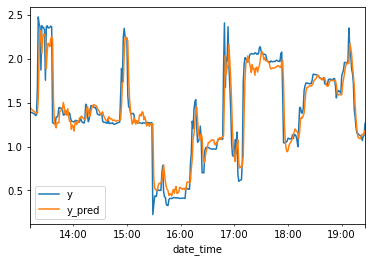

In [29]:
dft_plot = dft_result[dft_result['split'] == 'train']
dft_plot[['y', 'y_pred']].plot()

<AxesSubplot:xlabel='date_time'>

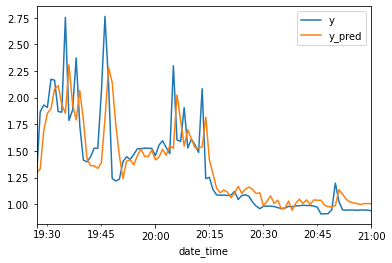

In [30]:
dft_plot = dft_result[dft_result['split'] == 'test']
dft_plot[['y', 'y_pred']].plot()

<AxesSubplot:xlabel='date_time'>

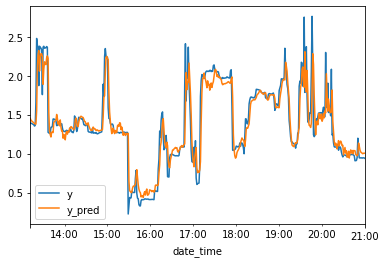

In [31]:
dft_plot = dft_result
dft_plot[['y', 'y_pred']].plot()

In [28]:
n_forecast = 10
y = dft_result['y (scaled)'].values
#print(y[-3:-1])
for i in range(1,n_forecast+1):
    x = y[-window_size-1:-1]
    x = x.reshape(1,1,-1)
    y = np.append(y,model.predict(x).flatten())
    #print(y[-3-i:-1])

y_fore = y[-n_forecast-1:-1]

print(y_fore)

[0.10480349 0.01612336 0.00909347 0.00792789 0.01805074 0.02358236
 0.02557661 0.02389653 0.01989014 0.02268111]
